In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [19]:
df = pd.read_csv("/Users/filippo/ScrivaniaLocale/E-HealthProject/dataset.csv",index_col=0)
print(df.head(10))
print(df.shape)

   index   age  gender  education  marital  income  phq_1  phq_2  phq_3  \
0      0  42.0       1        5.0        1   18000      0    0.0    1.0   
1      1  51.0       3       18.0        1   23000      0    0.0    0.0   
2      2  40.0       0        8.0        1   10000      0    0.0    0.0   
3      3  19.0       0       25.0        5   31000      2    1.0    0.0   
4      4  42.0       2       13.0        1   40000      0    1.0    0.0   
5      5  48.0       2       13.0        1   11000      0    0.0    0.0   
6      6  33.0       0       22.0        2   36400      0    1.0    0.0   
7      7  55.0       2        8.0        2   28000      0    0.0    0.0   
8      8  40.0       3       18.0        3   12000      0    0.0    0.0   
9      9  46.0       2       13.0        1   35000      2    0.0    2.0   

   phq_4  ...  ccs_3  ccs_4  ccs_5  ccs_6  ccs_7  ccs_8  ccs_9  ccs_10  \
0      0  ...    5.0    1.0    4.0    3.0      0      4      0       0   
1      0  ...    3.0    6.

0


<AxesSubplot:>

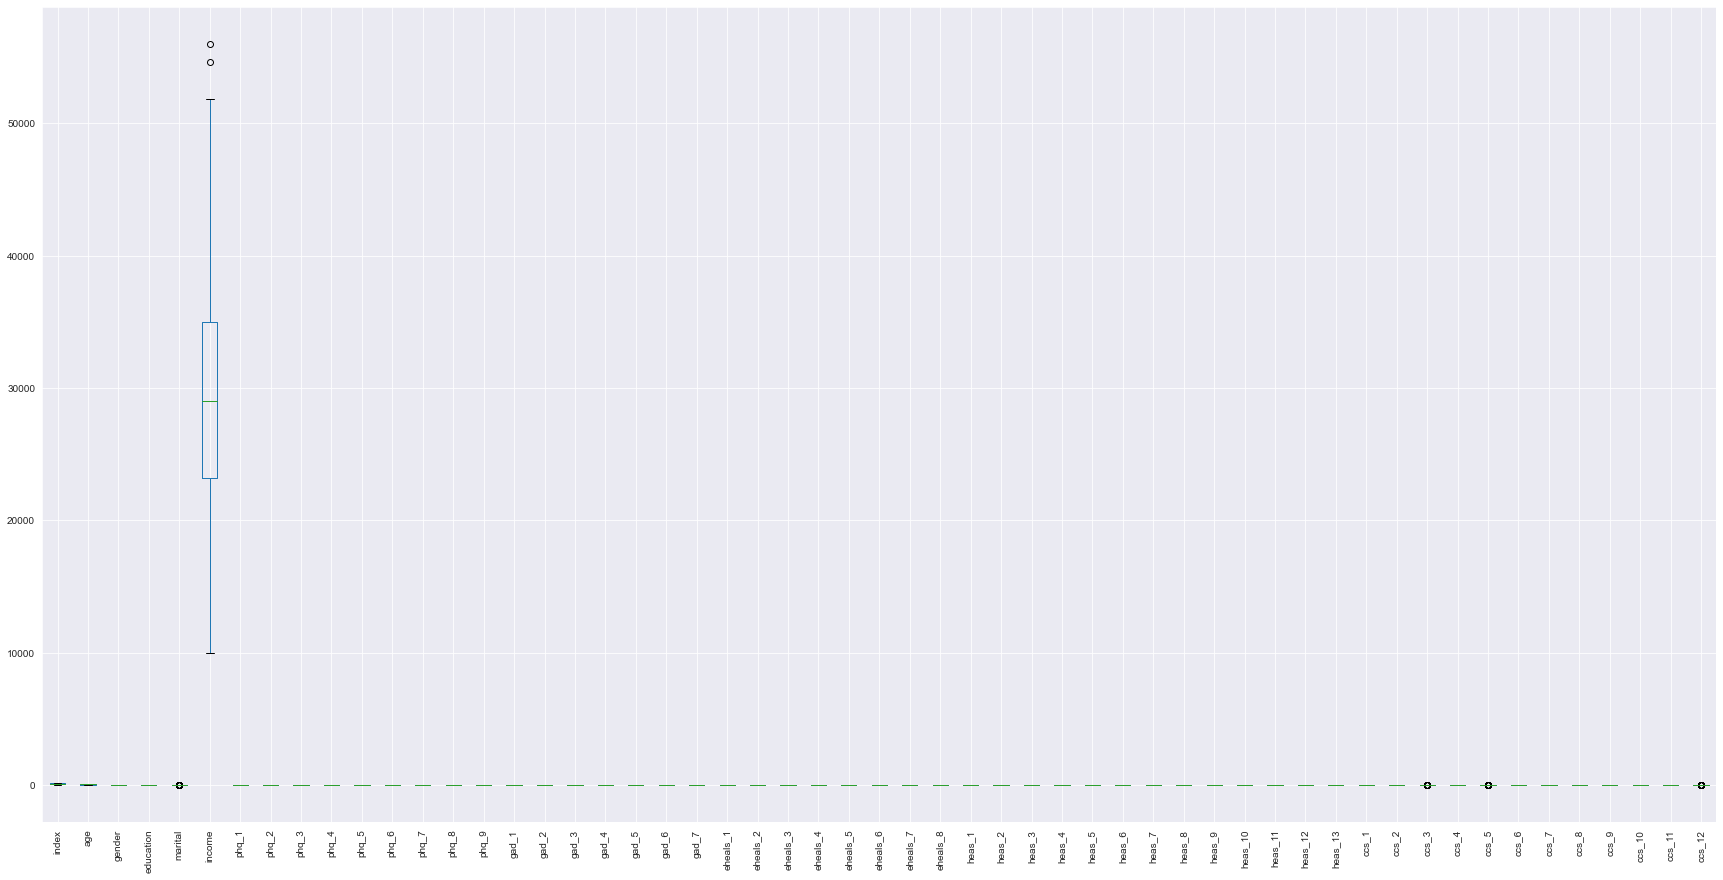

In [20]:
print(df.isna().sum().sum())

df.boxplot(rot=90,figsize=(30,15))

Adding the columns representing the score on each questionnaire

In [21]:
questionnaire_columns_phq = ['phq_1', 'phq_2', 'phq_3', 'phq_4', 'phq_5', 'phq_6', 'phq_7', 'phq_8', 'phq_9']
questionnaire_columns_gad = ['gad_1', 'gad_2', 'gad_3', 'gad_4', 'gad_5', 'gad_6', 'gad_7']
questionnaire_columns_eheals = ['eheals_1', 'eheals_2', 'eheals_3', 'eheals_4', 'eheals_5',
                                'eheals_6', 'eheals_7', 'eheals_8']
questionnaire_columns_heals = ['heas_1', 'heas_2', 'heas_3',
                               'heas_4', 'heas_5', 'heas_6', 'heas_7', 'heas_8',
                               'heas_9', 'heas_10','heas_11', 'heas_12', 'heas_13']
questionnaire_columns_ccs = ['ccs_1', 'ccs_2', 'ccs_4',
                               'ccs_5', 'ccs_8', 'ccs_9', 'ccs_10',
                               'ccs_11']

rowsSum = []

for row in range(0,150): # for each subject that responded to the questionnaire
    rowsSum.append(sum(df.loc[row,questionnaire_columns_phq]))
    
df['PHQ_sum'] = rowsSum

rowsSum = []

for row in range(0,150): # for each subject that responded to the questionnaire
    rowsSum.append(sum(df.loc[row,questionnaire_columns_gad]))
    
df['GAD_sum'] = rowsSum

rowsSum = []

for row in range(0,150): # for each subject that responded to the questionnaire
    rowsSum.append(sum(df.loc[row,questionnaire_columns_eheals]))
    
df['EHEALS_sum'] = rowsSum

rowsSum = []

for row in range(0,150): # for each subject that responded to the questionnaire
    rowsSum.append(sum(df.loc[row,questionnaire_columns_heals]))
    
df['HEALS_sum'] = rowsSum

rowsSum = []
for row in range(0,150): # for each subject that responded to the questionnaire
    currentSum = sum(df.loc[row,questionnaire_columns_ccs])
    currentSum += 6 - df.loc[row,'ccs_3']
    currentSum += 6 - df.loc[row,'ccs_6']
    currentSum += 6 - df.loc[row,'ccs_7']
    print(6 - df.loc[row,'ccs_12'])
    currentSum += 6 - df.loc[row,'ccs_12']
    
    rowsSum.append(currentSum)
    
df['CCS_sum'] = rowsSum

df.head()    

5
0
3
2
2
6
0
0
6
1
0
2
0
0
0
0
1
0
0
3
2
6
1
1
1
2
0
1
0
0
4
1
6
0
0
2
0
5
1
3
0
2
6
3
1
5
2
2
0
1
1
0
2
0
0
0
1
1
5
0
3
0
0
0
0
0
2
2
5
0
6
1
0
6
2
0
0
1
1
0
0
0
0
0
6
0
0
1
2
2
0
5
6
0
0
1
2
6
0
2
5
2
1
0
0
0
1
0
0
2
0
0
2
2
1
2
4
1
4
0
1
1
0
0
3
1
0
4
1
0
0
0
0
0
4
2
0
1
0
0
1
6
0
2
6
1
0
2
4
5


,index,age,gender,education,marital,income,phq_1,phq_2,phq_3,phq_4,...,ccs_8,ccs_9,ccs_10,ccs_11,ccs_12,PHQ_sum,GAD_sum,EHEALS_sum,HEALS_sum,CCS_sum
0,0,42.0,1,5.0,1,18000,0,0.0,1.0,0,...,4,0,0,3,1,2.0,0.0,17.0,8.0,33.0
1,1,51.0,3,18.0,1,23000,0,0.0,0.0,0,...,1,4,0,3,6,0.0,3.0,25.0,7.0,36.0
2,2,40.0,0,8.0,1,10000,0,0.0,0.0,0,...,0,2,1,6,3,1.0,4.0,20.0,2.0,38.0
3,3,19.0,0,25.0,5,31000,2,1.0,0.0,0,...,0,1,1,0,4,5.0,19.0,40.0,20.0,11.0
4,4,42.0,2,13.0,1,40000,0,1.0,0.0,0,...,1,1,0,5,4,7.0,6.0,29.0,16.0,22.0


In [22]:
## Normalizing INCOME 
df_income = df.income
max_income = max(df_income)
min_income = min(df_income)

df_income = (df_income - min_income)/(max_income - min_income)

df['income'] = df_income

In [23]:
df_Complete = df.copy()

df = df.loc[:,['age','PHQ_sum','GAD_sum','EHEALS_sum','HEALS_sum','CCS_sum']]

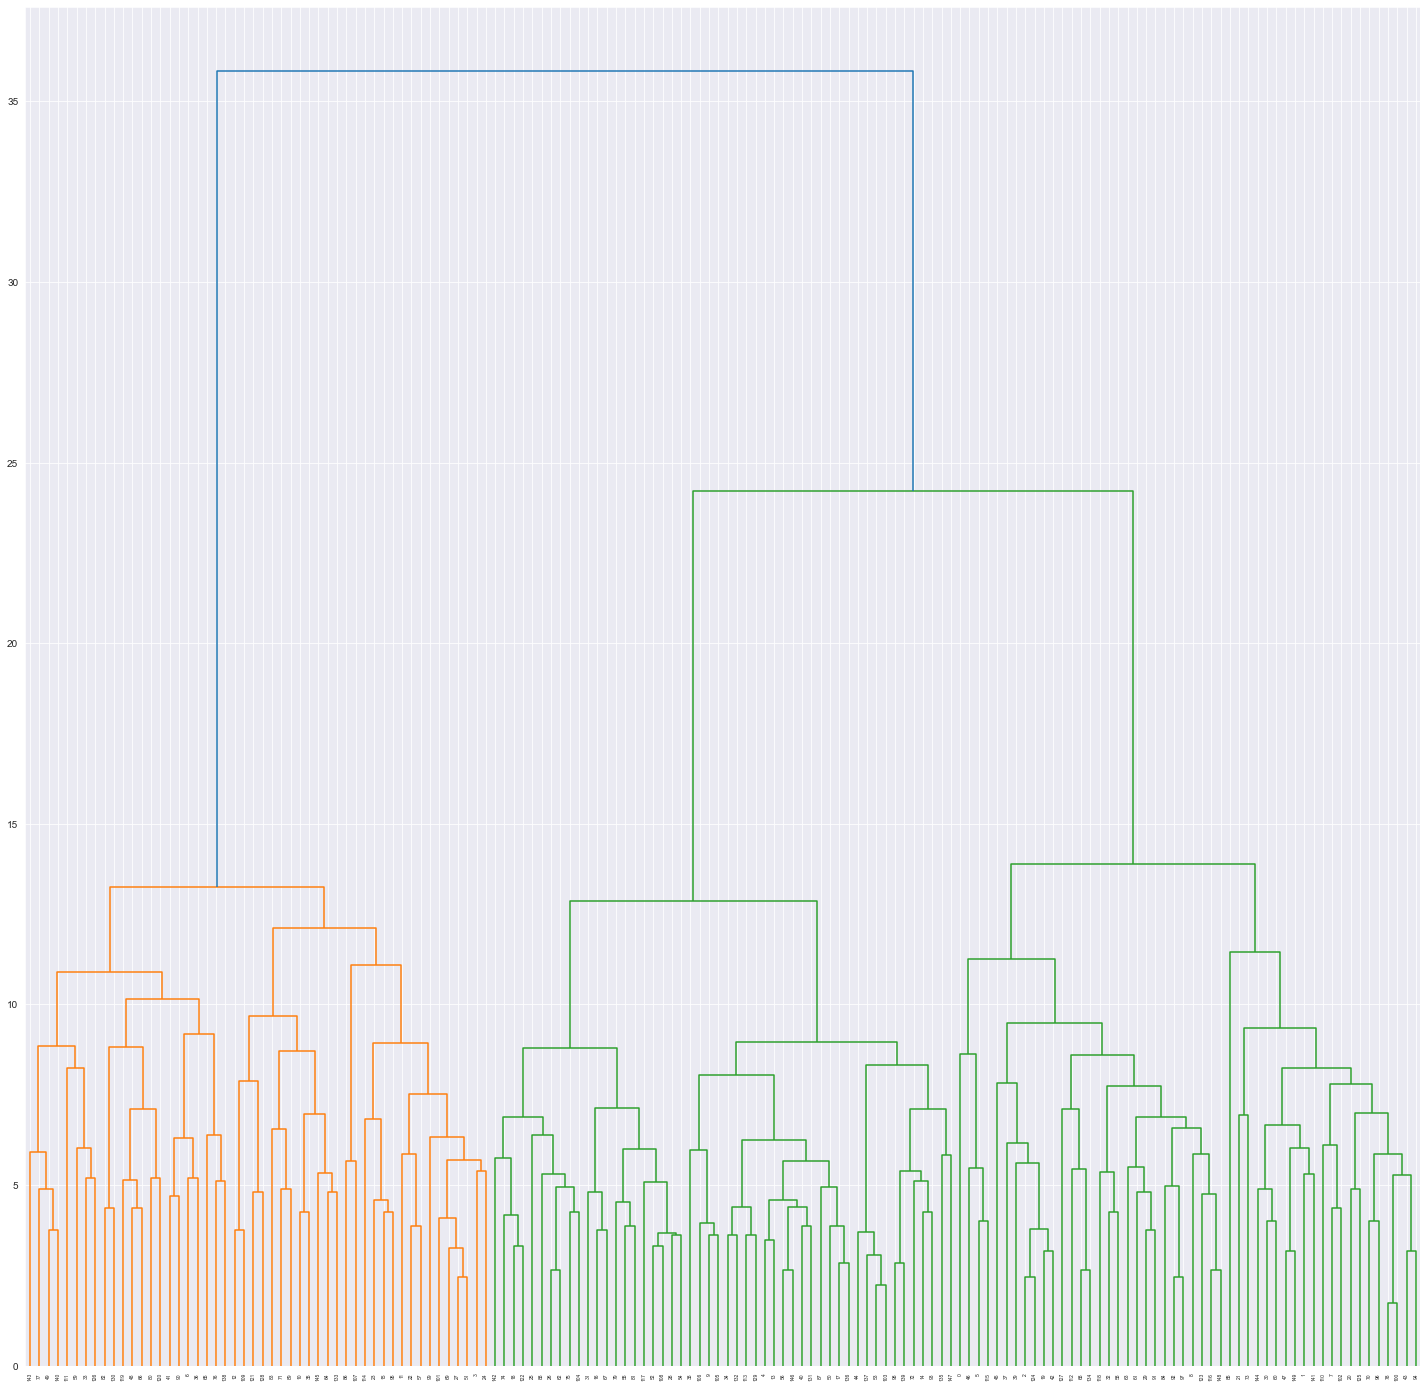

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage, fclusterdata

linkageData = linkage(df,method='average',metric='euclidean')

plt.figure(figsize=(25,25))
dendrogram(linkageData)
plt.show()

***Method -> AVERAGE***

In [25]:
from sklearn.metrics import silhouette_samples,silhouette_score

clusters = []
clusterLabels = fclusterdata(df,t=3,criterion='maxclust',metric='euclidean',method='average')

unique = np.unique(clusterLabels)
print("Checking the number of output clusters.\nOutput classes: ",unique)


silhouette_avg = silhouette_score(df, clusterLabels)
print("For n_clusters =",str(3),"The average silhouette_score is :",silhouette_avg)
sample_silhouette_values = silhouette_samples(df, clusterLabels)
print(sample_silhouette_values)
print("Average silhouette: ", np.mean(sample_silhouette_values))

count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print("Number of values below 0: ", count)

Checking the number of output clusters.
Output classes:  [1 2 3]
For n_clusters = 3 The average silhouette_score is : 0.5476496713293426
[0.43549873 0.50035124 0.59692803 0.60581808 0.64838992 0.56114749
 0.31185909 0.49525245 0.47117701 0.6393336  0.58762504 0.57773886
 0.60860393 0.63760634 0.63144378 0.6601262  0.37942356 0.42242487
 0.5161219  0.52287561 0.59173495 0.5825104  0.63614188 0.64993222
 0.64796579 0.52455893 0.59687971 0.66020509 0.5223323  0.50001365
 0.56741856 0.4577634  0.56954729 0.46895461 0.52196366 0.62808086
 0.44789656 0.57171315 0.58745277 0.58157266 0.60448704 0.44822103
 0.53809985 0.54009579 0.47632144 0.50450007 0.58994262 0.49350486
 0.53514209 0.52831956 0.44038938 0.66393853 0.52768545 0.50755223
 0.4994078  0.62417368 0.51131122 0.62666613 0.55143227 0.57070167
 0.5472621  0.56933528 0.61890608 0.53962574 0.57396849 0.37426018
 0.48534824 0.48021551 0.62544099 0.64606197 0.50374055 0.61342454
 0.653924   0.52680624 0.62694873 0.61536639 0.18946706 0.4

***Method -> SINGLE***

In [26]:


clusterLabels = fclusterdata(df,t=3,criterion='maxclust',metric='euclidean',method='single')

unique = np.unique(clusterLabels)
print("Checking the number of output clusters.\nOutput classes: ",unique)

silhouette_avg = silhouette_score(df, clusterLabels)
print("For n_clusters =",str(3),"The average silhouette_score is :",silhouette_avg)
sample_silhouette_values = silhouette_samples(df, clusterLabels)
print(sample_silhouette_values)
print("Average silhouette: ", np.mean(sample_silhouette_values))

count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print("Number of values below 0: ", count)

Checking the number of output clusters.
Output classes:  [1 2 3]
For n_clusters = 3 The average silhouette_score is : 0.5476496713293426
[0.43549873 0.50035124 0.59692803 0.60581808 0.64838992 0.56114749
 0.31185909 0.49525245 0.47117701 0.6393336  0.58762504 0.57773886
 0.60860393 0.63760634 0.63144378 0.6601262  0.37942356 0.42242487
 0.5161219  0.52287561 0.59173495 0.5825104  0.63614188 0.64993222
 0.64796579 0.52455893 0.59687971 0.66020509 0.5223323  0.50001365
 0.56741856 0.4577634  0.56954729 0.46895461 0.52196366 0.62808086
 0.44789656 0.57171315 0.58745277 0.58157266 0.60448704 0.44822103
 0.53809985 0.54009579 0.47632144 0.50450007 0.58994262 0.49350486
 0.53514209 0.52831956 0.44038938 0.66393853 0.52768545 0.50755223
 0.4994078  0.62417368 0.51131122 0.62666613 0.55143227 0.57070167
 0.5472621  0.56933528 0.61890608 0.53962574 0.57396849 0.37426018
 0.48534824 0.48021551 0.62544099 0.64606197 0.50374055 0.61342454
 0.653924   0.52680624 0.62694873 0.61536639 0.18946706 0.4

In [27]:
from scipy.cluster.vq import kmeans2

In [28]:
clusters = []
centroids, clusterLabels= kmeans2(data=df, k=3, iter=1000, minit='++')

unique = np.unique(clusterLabels)
print("Checking the number of output clusters.\nOutput classes: ",unique)


silhouette_avg = silhouette_score(df, clusterLabels)
print("For n_clusters =",str(3),"The average silhouette_score is :",silhouette_avg)
sample_silhouette_values = silhouette_samples(df, clusterLabels)
print(sample_silhouette_values)
print("Average silhouette: ", np.mean(sample_silhouette_values))

count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print("Number of values below 0: ", count)

Checking the number of output clusters.
Output classes:  [0 1 2]
For n_clusters = 3 The average silhouette_score is : 0.5476496713293426
[0.43549873 0.50035124 0.59692803 0.60581808 0.64838992 0.56114749
 0.31185909 0.49525245 0.47117701 0.6393336  0.58762504 0.57773886
 0.60860393 0.63760634 0.63144378 0.6601262  0.37942356 0.42242487
 0.5161219  0.52287561 0.59173495 0.5825104  0.63614188 0.64993222
 0.64796579 0.52455893 0.59687971 0.66020509 0.5223323  0.50001365
 0.56741856 0.4577634  0.56954729 0.46895461 0.52196366 0.62808086
 0.44789656 0.57171315 0.58745277 0.58157266 0.60448704 0.44822103
 0.53809985 0.54009579 0.47632144 0.50450007 0.58994262 0.49350486
 0.53514209 0.52831956 0.44038938 0.66393853 0.52768545 0.50755223
 0.4994078  0.62417368 0.51131122 0.62666613 0.55143227 0.57070167
 0.5472621  0.56933528 0.61890608 0.53962574 0.57396849 0.37426018
 0.48534824 0.48021551 0.62544099 0.64606197 0.50374055 0.61342454
 0.653924   0.52680624 0.62694873 0.61536639 0.18946706 0.4

**SELECTING THE BEST CLUSTER LABELS**

In [29]:
clusters = []
clusterLabels = fclusterdata(df,t=3,criterion='maxclust',metric='euclidean',method='average')

unique = np.unique(clusterLabels)
print("Checking the number of output clusters.\nOutput classes: ",unique)


silhouette_avg = silhouette_score(df, clusterLabels)
print("For n_clusters =",str(3),"The average silhouette_score is :",silhouette_avg)
sample_silhouette_values = silhouette_samples(df, clusterLabels)
print(sample_silhouette_values)
print("Average silhouette: ", np.mean(sample_silhouette_values))

count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print("Number of values below 0: ", count)

Checking the number of output clusters.
Output classes:  [1 2 3]
For n_clusters = 3 The average silhouette_score is : 0.5476496713293426
[0.43549873 0.50035124 0.59692803 0.60581808 0.64838992 0.56114749
 0.31185909 0.49525245 0.47117701 0.6393336  0.58762504 0.57773886
 0.60860393 0.63760634 0.63144378 0.6601262  0.37942356 0.42242487
 0.5161219  0.52287561 0.59173495 0.5825104  0.63614188 0.64993222
 0.64796579 0.52455893 0.59687971 0.66020509 0.5223323  0.50001365
 0.56741856 0.4577634  0.56954729 0.46895461 0.52196366 0.62808086
 0.44789656 0.57171315 0.58745277 0.58157266 0.60448704 0.44822103
 0.53809985 0.54009579 0.47632144 0.50450007 0.58994262 0.49350486
 0.53514209 0.52831956 0.44038938 0.66393853 0.52768545 0.50755223
 0.4994078  0.62417368 0.51131122 0.62666613 0.55143227 0.57070167
 0.5472621  0.56933528 0.61890608 0.53962574 0.57396849 0.37426018
 0.48534824 0.48021551 0.62544099 0.64606197 0.50374055 0.61342454
 0.653924   0.52680624 0.62694873 0.61536639 0.18946706 0.4

In [30]:
clusterLabels = pd.DataFrame(clusterLabels,columns=['Cluster label'])

df = pd.concat(objs=[df,clusterLabels], axis=1)
print(df.head())
df.shape

    age  PHQ_sum  GAD_sum  EHEALS_sum  HEALS_sum  CCS_sum  Cluster label
0  42.0      2.0      0.0        17.0        8.0     33.0              3
1  51.0      0.0      3.0        25.0        7.0     36.0              3
2  40.0      1.0      4.0        20.0        2.0     38.0              3
3  19.0      5.0     19.0        40.0       20.0     11.0              1
4  42.0      7.0      6.0        29.0       16.0     22.0              2


(150, 7)

In [31]:
df.to_csv("/Users/filippo/ScrivaniaLocale/E-HealthProject/datasetWithClusterLabels.csv")